In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('./mystyles.mplstyle')
from mpl_toolkits import mplot3d

Problema: Tiramos dardos a un blanco de radio 1 y queremos saber la distribución de radios si los dardos caen en lugares aleatorios

In [2]:
v = np.random.uniform(-1, 1, [20000, 2])

In [5]:
r = np.sqrt(v[:,0]**2 + v[:,1]**2)
vc = v[r<1,:]
rc = r[r<1]

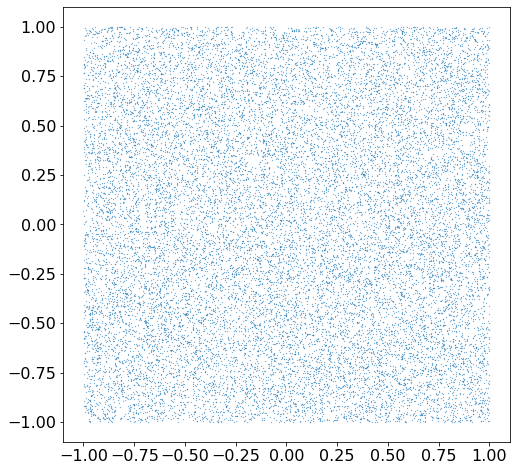

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.plot(v[:,0], v[:,1], linestyle='None', marker='.', markersize=0.5)

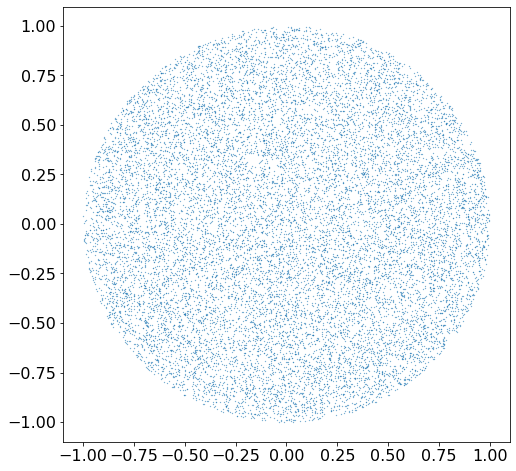

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.plot(vc[:,0], vc[:,1], linestyle='None', marker='.', markersize=0.5)

Text(0, 0.5, '1/N dN/dr')

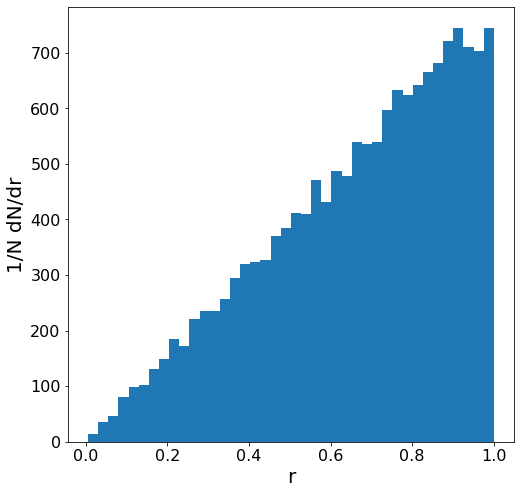

In [59]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.hist(rc, bins=40)
ax.set_xlabel('r')
ax.set_ylabel('1/N dN/dr')

y si es gaussiano?

<div>
<img src="normv.png" width="800"/>
</div>

ver: https://datagenetics.com/blog/january12012/index.html

In [94]:
v = np.random.normal(loc=[0,0], scale=[.5,.5], size=[5000, 2])

In [95]:
r = np.sqrt(v[:,0]**2 + v[:,1]**2)
vc = v[r<1,:]
rc = r[r<1]

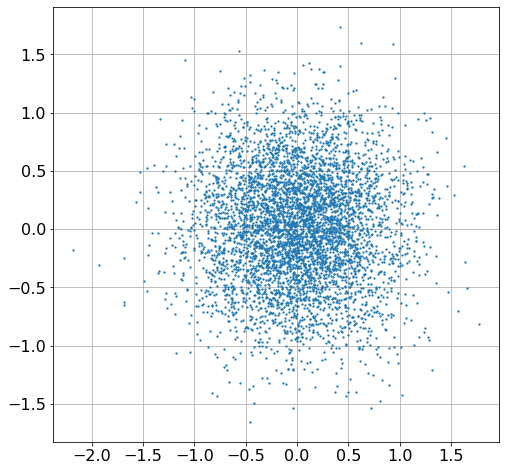

In [98]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.plot(v[:,0], v[:,1], linestyle='None', marker='.', markersize=2.5)
ax.grid()

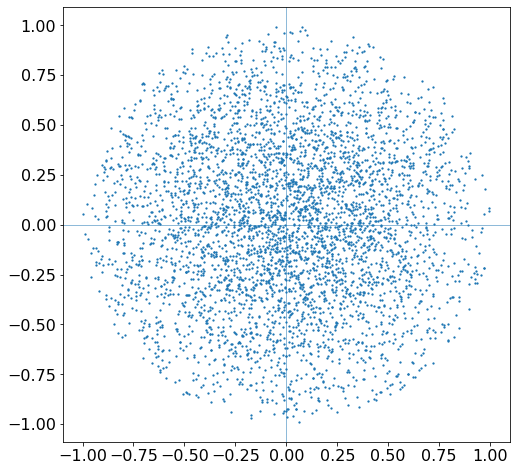

In [106]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.plot(vc[:,0], vc[:,1], linestyle='None', marker='.', markersize=2.5)
ax.axhline(0, linewidth=0.5)
ax.axvline(0, linewidth=0.5)

Text(0, 0.5, '1/N dN/dr')

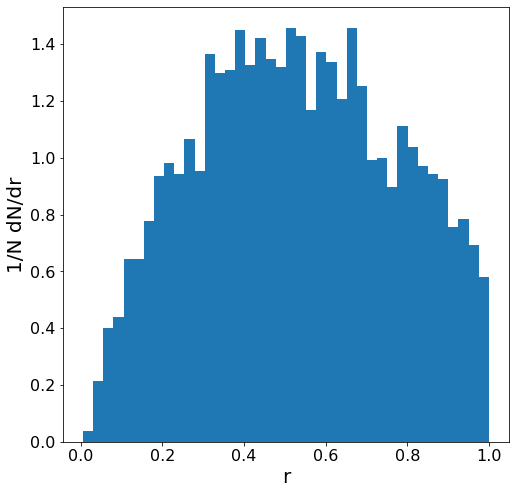

In [110]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.hist(rc, bins=40, density=True)
ax.set_xlabel('r')
ax.set_ylabel('1/N dN/dr')

$\rule{0pt}{30pt}$
_________
## Problema de la lluvia de meteoritos

**Una lluvia de meteoritos se produce cuando la Tierra pasa por una región con restos de un cometa.  El ápex se encuentra en las coordenadas:**

$$(\alpha, \delta)=(30, -4)$$

**¿Cuál es la probabilidad de observar meteoritos desde Bosque Alegre, a las 5 de madrugada, a una distancia cenital menor de 30 grados?**

![meteor_shower](apex1.png)

Cómo se hace la cuenta???  ...Hagamos una simulación

Éste es el plan: 

1. Calcular las posiciones en una esfera suponiendo que el apex está en el eje Z.
2. Calcular la posición relativa entre el apex y el cenit
3. Calcular las distancias entre el cenit y las posiciones aleatorias
4. Calcular la fracción que es menor que 30$^o$

In [9]:
alpha = 30
delta = -4
dist_cen_max = 30
hora = 5

In [10]:
from astropy.coordinates import EarthLocation
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import AltAz
from astropy.coordinates import SkyCoord

$\rule{0pt}{2cm}$

### Transformación entre sistemas de coordenadas

In [11]:
EABA = EarthLocation(lat='-31d', lon='-64d', height=1300*u.m)
observing_time = Time(f'2020-08-27 {hora+3}:00')   # hora en UTC
aa = AltAz(location=EABA, obstime=observing_time)

In [12]:
aa

<AltAz Frame (obstime=2020-08-27 08:00:00.000, location=(2399251.52441657, -4919194.61742628, -3266563.06615133) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

In [13]:
apex_eq = SkyCoord(alpha*u.deg, delta*u.deg, frame='icrs')

In [14]:
apex_eq

<SkyCoord (ICRS): (ra, dec) in deg
    (30., -4.)>

In [15]:
apex_aa = apex_eq.transform_to(aa)

In [16]:
apex_aa

<SkyCoord (AltAz: obstime=2020-08-27 08:00:00.000, location=(2399251.52441657, -4919194.61742628, -3266563.06615133) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (356.15941663, 62.8493083)>

In [17]:
apex_aa.cartesian

<CartesianRepresentation (x, y, z) [dimensionless]
    (0.45530754, -0.03056543, 0.88980942)>

El coseno del ángulo se puede obtener con el producto punto de los dos vectores, o sea:

In [18]:
cos_sep = apex_aa.cartesian.z

In [19]:
cos_sep

<Quantity 0.88980942>

In [20]:
sep = np.arccos(cos_sep)

In [21]:
print(f'La separación entre el cenit y el apex es {sep.value: .3f} {sep.unit} ')

La separación entre el cenit y el apex es  0.474 rad 


In [22]:
sep_deg = sep.to(u.deg)

In [23]:
print(f'La separación entre el cenit y el apex es {sep_deg.value: .3f} {sep_deg.unit} ')

La separación entre el cenit y el apex es  27.151 deg 


In [24]:
cenit = np.array([0, np.sqrt(1-cos_sep**2), cos_sep])
print(cenit)

[0.         0.45633233 0.88980942]


![meteor_shower2](apex2.png)

$\rule{0pt}{2cm}$

### Simulación

In [25]:
N = 5000
xx, yy = np.random.uniform(-1, 1, size=(2, N))
X = np.column_stack([xx, yy])
norma2 = np.linalg.norm(X, axis=1)

disco = norma2 < 1
z = np.sqrt(1. - norma2[disco]**2)

X = np.column_stack([xx[disco], yy[disco], z])
norma3 = np.linalg.norm(X, axis=1)

x = xx[disco]/norma3
y = yy[disco]/norma3
z = z/norma3

N = len(x)
ceros = np.zeros(N)

(-1.0, 1.0)

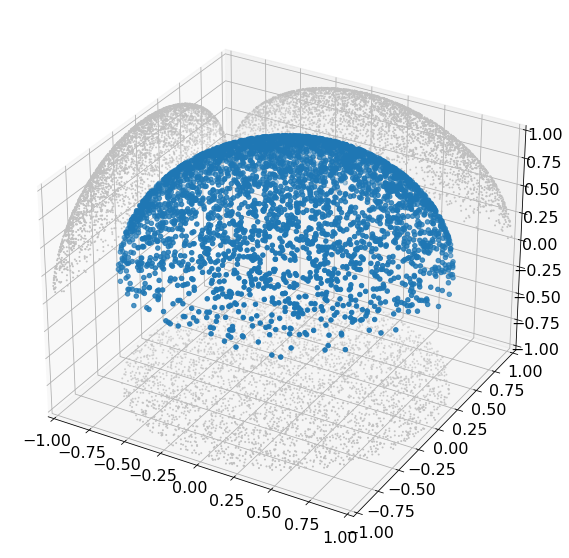

In [26]:
opts = {'marker': 'o', 'color': 'silver', 's': 1}
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z)
ax.scatter3D(x, y, ceros-1, **opts)
ax.scatter3D(ceros-1, y, z, **opts)
ax.scatter3D(x, ceros+1, z, **opts)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

Ahora, para cada punto que generamos random, calculamos la distancia al cenit.

En el sistema que apunta al apex, las coordenadas del cenit son:

In [27]:
angdist = []
for i in range(len(x)):
    d = np.dot(cenit, [x[i], y[i], z[i]])
    theta = np.arccos(d)
    angdist.append(theta)

angdist = np.array(angdist)*180./np.pi
near = angdist < dist_cen_max
angdists = angdist.copy()
angdists.sort()

In [29]:
%matplotlib inline
ceros = np.array([0]*len(x))

Text(0, 0.5, 'Y')

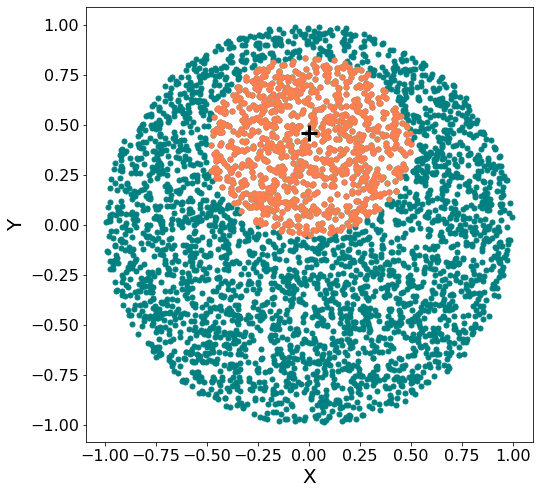

In [54]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(x, y, marker='.', color='teal')
ax.scatter(x[near], y[near], marker='.', color='coral')
ax.scatter(cenit[0], cenit[1], marker='+', s=260, color='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')

Text(0, 0.5, 'dN/dz')

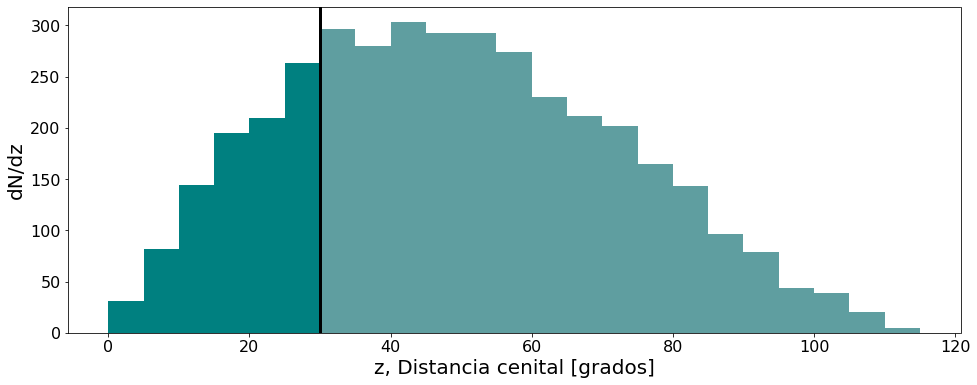

In [58]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
bins = np.arange(0, 120, 5)
ax.hist(angdist[near], bins=bins, color='teal')
ax.hist(angdist[~near], bins=bins, color='cadetblue')
ax.axvline(dist_cen_max, color='k')
ax.set_xlabel('z, Distancia cenital [grados]')
ax.set_ylabel('dN/dz')

In [32]:
proba = sum(angdist<30)/N
print(f'\nLa probabilidad de que un meteorito se vea a una\n',
      f'distancia cenital menor que 30 grados es {proba:.4f}\n')


La probabilidad de que un meteorito se vea a una
 distancia cenital menor que 30 grados es 0.2374



Text(0, 0.5, 'F')

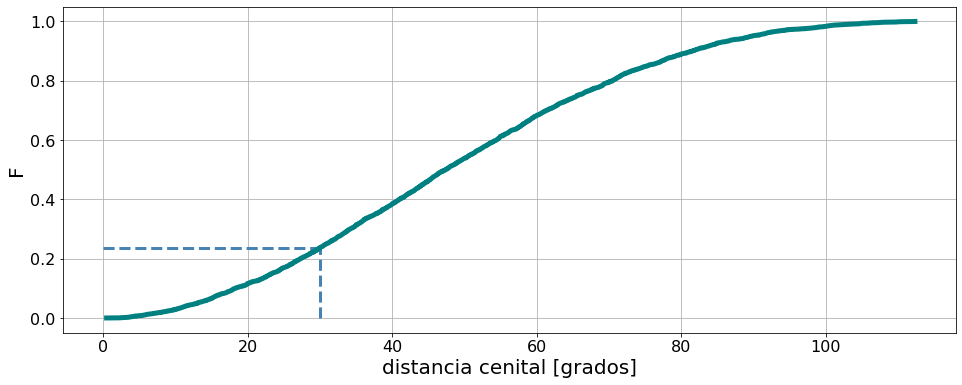

In [36]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
plt.plot(angdists, np.array(range(N))/N, linewidth=5, color='teal')
i = np.argmin(angdists<dist_cen_max)
ax.vlines(x=angdists[i], ymin=0, ymax=proba, linestyle='--', color='steelblue')
ax.hlines(y=proba, xmin=0, xmax=angdists[i], linestyle='--', color='steelblue')
ax.grid()
ax.set_xlabel('distancia cenital [grados]')
ax.set_ylabel('F')

Text(0, 0.5, 'Y')

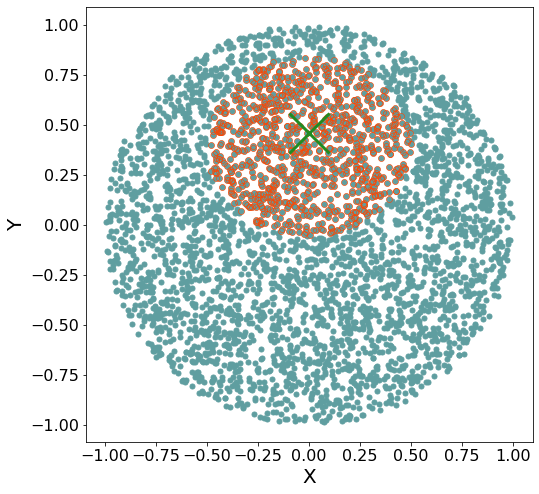

In [34]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.plot(x, y, marker='.', linestyle='None', color='cadetblue')
ax.plot(x[near], y[near], marker='o', markersize=6, mew=0.6 ,linestyle='None', color='orangered', mfc='None')
ax.plot(cenit[0], cenit[1], marker='x', markersize=40, color='forestgreen', mew=3)
ax.set_xlabel('X')
ax.set_ylabel('Y')